# 정리

* prophet으로 예측을 돌리면, y값의 예측값인 y_hat이 생성되는 것 외에도 trend, additive_terms, daily, weekly 등의 지표 값도 생성됨
* 예측으로 나오는 지표들 중 trend를 사용함
* trend 값이 8000에서 71800까지 꾸준히 증가하는 모습을 보임
* 제공된 train.csv의 rental값을 trend로 나누어주자 성능이 8%정도 향상됨

In [1]:
from prophet import Prophet

import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import random

# 데이터준비

In [2]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

# 시계열 예측

## 시계열 데이터 준비

In [3]:
df=train_df[['date','rental']].copy()

In [4]:
df.columns=['ds','y']

In [5]:
df

,ds,y
0,2018-01-01,4950
1,2018-01-02,7136
2,2018-01-03,7156
3,2018-01-04,7102
4,2018-01-05,7705
...,...,...
1090,2020-12-27,37103
1091,2020-12-28,46912
1092,2020-12-29,35747
1093,2020-12-30,22488


## 시계열 모델 생성 및 파라미터 조절

In [6]:
m = Prophet()
m.daily_seasonality=True
m.weekly_seasonality=True
m.yearly_seasonality=True
m.fit(df)

Initial log joint probability = -73.9282


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1699.14   5.17586e-06       69.4858      0.7698      0.7698      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       1699.17   0.000410967       93.1272   3.446e-06       0.001      181  LS failed, Hessian reset 
     150       1699.19   3.83621e-05       77.7678   4.552e-07       0.001      266  LS failed, Hessian reset 
     177       1699.19    1.5188e-07       69.0376      0.2292           1      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


## 예측

In [7]:
future=m.make_future_dataframe(365)
forecast = m.predict(future)

In [8]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,8258.989574,-28851.032493,9507.239876,8258.989574,8258.989574,-17315.200052,-17315.200052,-17315.200052,13246.213245,...,-174.146617,-174.146617,-174.146617,-30387.266680,-30387.266680,-30387.266680,0.0,0.0,0.0,-9056.210477
1,2018-01-02,8284.941801,-24364.342735,13584.792565,8284.941801,8284.941801,-14015.297958,-14015.297958,-14015.297958,13246.213245,...,2483.963411,2483.963411,2483.963411,-29745.474614,-29745.474614,-29745.474614,0.0,0.0,0.0,-5730.356157
2,2018-01-03,8310.894028,-26694.252901,11989.484033,8310.894028,8310.894028,-15841.074914,-15841.074914,-15841.074914,13246.213245,...,-21.135113,-21.135113,-21.135113,-29066.153045,-29066.153045,-29066.153045,0.0,0.0,0.0,-7530.180885
3,2018-01-04,8336.846255,-23969.534837,14776.603012,8336.846255,8336.846255,-14509.758992,-14509.758992,-14509.758992,13246.213245,...,608.319048,608.319048,608.319048,-28364.291284,-28364.291284,-28364.291284,0.0,0.0,0.0,-6172.912736
4,2018-01-05,8362.798482,-22484.198798,15150.590611,8362.798482,8362.798482,-12119.006470,-12119.006470,-12119.006470,13246.213245,...,2290.018415,2290.018415,2290.018415,-27655.238130,-27655.238130,-27655.238130,0.0,0.0,0.0,-3756.207988


In [9]:
print(*forecast['trend'], sep='\n')

8258.989574424688
8284.941801423322
8310.894028421955
8336.846255420587
8362.79848241922
8388.750709417855
8414.702936416486
8440.655163415122
8466.607390413754
8492.559617412386
8518.511844411021
8544.464071409653
8570.416298408285
8596.36852540692
8622.320752405552
8648.272979404184
8674.22520640282
8700.177433401452
8726.129660400084
8752.08188739872
8778.034114397351
8803.986341395985
8829.938568394618
8855.89079539325
8881.843022391884
8907.795249390518
8933.74747638915
8959.699703387783
8985.651930386417
9011.604157385049
9037.556384383683
9063.508611382316
9089.460838380948
9115.413065379582
9141.365292378216
9167.31751937685
9193.269750209278
9219.221981041706
9245.174211874137
9271.126442706565
9297.078673538994
9323.030904371422
9348.983135203853
9374.93536603628
9400.88759686871
9426.839827701138
9452.792058533567
9478.744289365995
9504.696520198426
9530.648751030854
9556.600981863283
9582.553212695711
9608.50544352814
9634.45767436057
9660.409905192999
9686.362136025427
971

## 결과

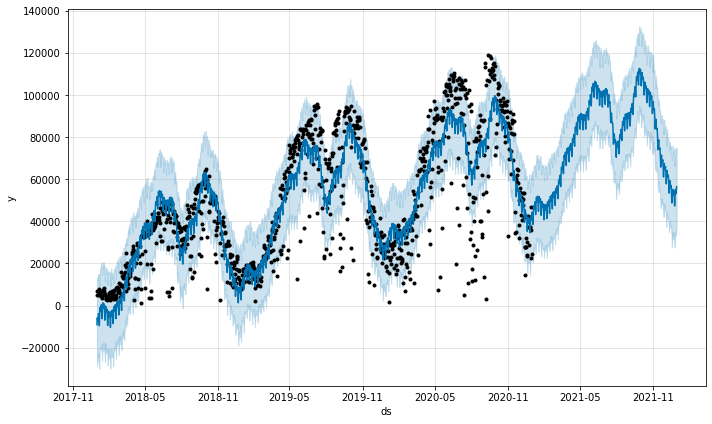

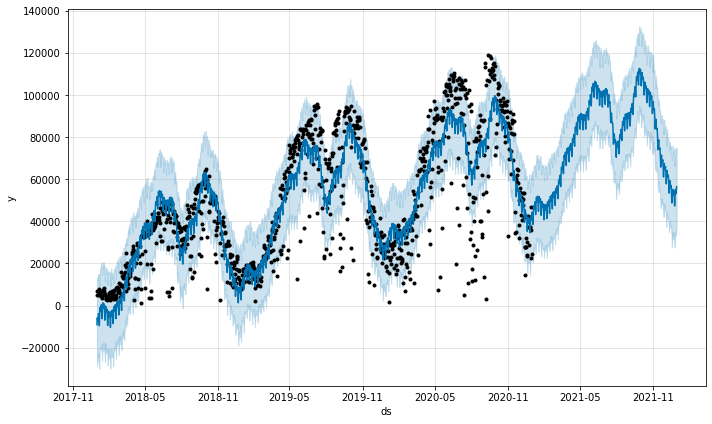

In [10]:
m.plot(forecast)

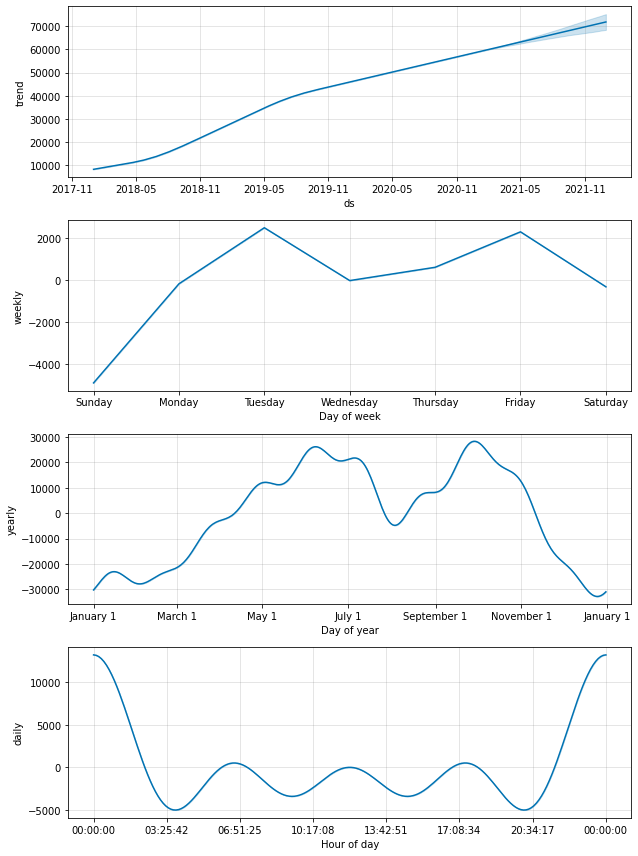

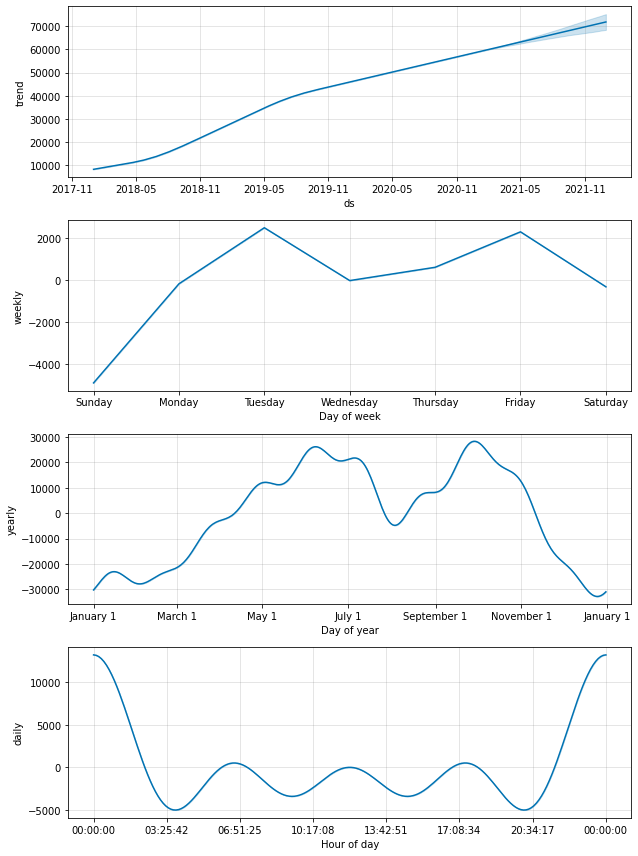

In [11]:
m.plot_components(forecast)

# Trend를 적용한 데이터를 사용한 모델과 기존 데이터를 사용한 모델 성능 비교

In [12]:
random_state_list=[random.randint(0, 100) for _ in range(10)]
random_state_list

[44, 89, 11, 5, 33, 95, 38, 99, 48, 67]

In [13]:
train_df.fillna(0, inplace=True)

In [14]:
train_df2 = train_df.copy()
train_df2['rental']=train_df2['rental']/forecast[:-365]['trend']

In [15]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X.shape, y.shape

((1095, 11), (1095,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123456)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.7077059482574044
Oob_Score : 0.7270143149286589
2번째
Score : 0.71357118393258
Oob_Score : 0.7175042642379457
3번째
Score : 0.6975317535923451
Oob_Score : 0.7251277219775681
4번째
Score : 0.7106316805199717
Oob_Score : 0.7220464371612607
5번째
Score : 0.7094280499590933
Oob_Score : 0.7267508203954718
6번째
Score : 0.7195246285489827
Oob_Score : 0.7232220264665243
7번째
Score : 0.7139525523583135
Oob_Score : 0.7211434608627207
8번째
Score : 0.7060145642265391
Oob_Score : 0.725215451215673
9번째
Score : 0.7107411866472828
Oob_Score : 0.722909312595408
10번째
Score : 0.7054138240965885
Oob_Score : 0.7210335420938443


In [17]:
X,y = train_df2.iloc[:,1:-1].to_numpy(), train_df2.iloc[:,-1].to_numpy()
X.shape, y.shape

((1095, 11), (1095,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=False)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.7991320434270539
Oob_Score : 0.8070155515451635
2번째
Score : 0.7929519478297113
Oob_Score : 0.8034793258114975
3번째
Score : 0.7937463800537136
Oob_Score : 0.809238643390868
4번째
Score : 0.7979630217709429
Oob_Score : 0.8098499400037998
5번째
Score : 0.7983189918709075
Oob_Score : 0.8108814474024346
6번째
Score : 0.7944178509530908
Oob_Score : 0.8088360549831672
7번째
Score : 0.8006204893493217
Oob_Score : 0.8066877450867238
8번째
Score : 0.7938956211741359
Oob_Score : 0.8028508130073102
9번째
Score : 0.8001252140373614
Oob_Score : 0.8058604147467026
10번째
Score : 0.790905340393766
Oob_Score : 0.8057366319973374


In [19]:
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123456)
# for i, state in enumerate(random_state_list): 
#     rf = RandomForestRegressor(oob_score=True, random_state=state)
#     rf.fit(X_train, y_train)
#     score=rf.score(X_test, y_test)
#     print(f'{i+1}번째')
#     print(f'Score : {score}')
#     print(f'Oob_Score : {rf.oob_score_}')